<a href="https://colab.research.google.com/github/Jacin21/Sales_data_task/blob/main/Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Possible insights




*   <h3>Finding the overall sales trend

*   <h3>Finding the top 20 expensive product soled

*   <h3>Finding the most selling product

*   <h3>Finding the most profitable category

*   <h3>Finding the most preffered currency code








Importing the Libraries

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Reading the Dataset

In [80]:
data=pd.read_excel('/content/Data Analyst Task (4).xls')

In [81]:
data.head()

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
0,user1,Product1,Initiated,NaN,2022-08-01 04:55:00,2022-07-31,Direct,3999.0,NaN,INR,NaN
1,user2,Product2,Initiated,NaN,2022-08-01 04:46:00,2022-07-31,Direct,999.0,NaN,INR,NaN
2,user4,Product3,Initiated,NaN,2022-08-01 03:21:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
3,user6,Product3,Initiated,NaN,2022-08-01 00:56:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
4,user8,Product4,Initiated,NaN,2022-08-01 00:46:00,2022-07-31,Direct,2022.0,NaN,INR,NaN


In [82]:
data.tail()

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
9509,user7253,Product105,paid,Coupon94,2022-06-01 14:46:00,2022-06-01,Direct,7.92,card,INR,NaN
9510,user7253,Product105,paid,NaN,2022-06-01 12:36:00,2022-06-01,Direct,8.10,card,INR,NaN
9511,user7253,Product105,paid,NaN,2022-06-01 12:31:00,2022-06-01,Direct,7.92,card,INR,NaN
9512,user10657,Product2,paid,NaN,2022-06-01 07:20:00,2022-06-01,Direct,999.00,paylater,INR,NaN
9513,user10658,Product10,refund,NaN,2022-05-28 06:21:00,2022-06-21,Direct,999.00,paylater,INR,NaN


In [83]:
data.describe()

,Product Amount with GST
count,9513.000000
mean,1464.982533
std,1277.535383
min,4.680000
25%,499.000000
50%,1499.000000
75%,1999.000000
max,29992.000000


In [84]:
data.columns

Index(['User ID', 'Product Code', 'Payment Status', 'Coupon code',
       'Lead Registered Time', 'Sales Date', 'Source',
       'Product Amount with GST', 'Payment Mode', 'Currency  Code',
       'Transaction Bank'],
      dtype='object')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User ID                  9514 non-null   object        
 1   Product Code             9514 non-null   object        
 2   Payment Status           9514 non-null   object        
 3   Coupon code              662 non-null    object        
 4   Lead Registered Time     9514 non-null   datetime64[ns]
 5   Sales Date               9514 non-null   datetime64[ns]
 6   Source                   9514 non-null   object        
 7   Product Amount with GST  9513 non-null   float64       
 8   Payment Mode             1730 non-null   object        
 9   Currency  Code           9514 non-null   object        
 10  Transaction Bank         92 non-null     object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 817.7+ KB


<h3>Visualize the distribution of the numerical columns using histograms:


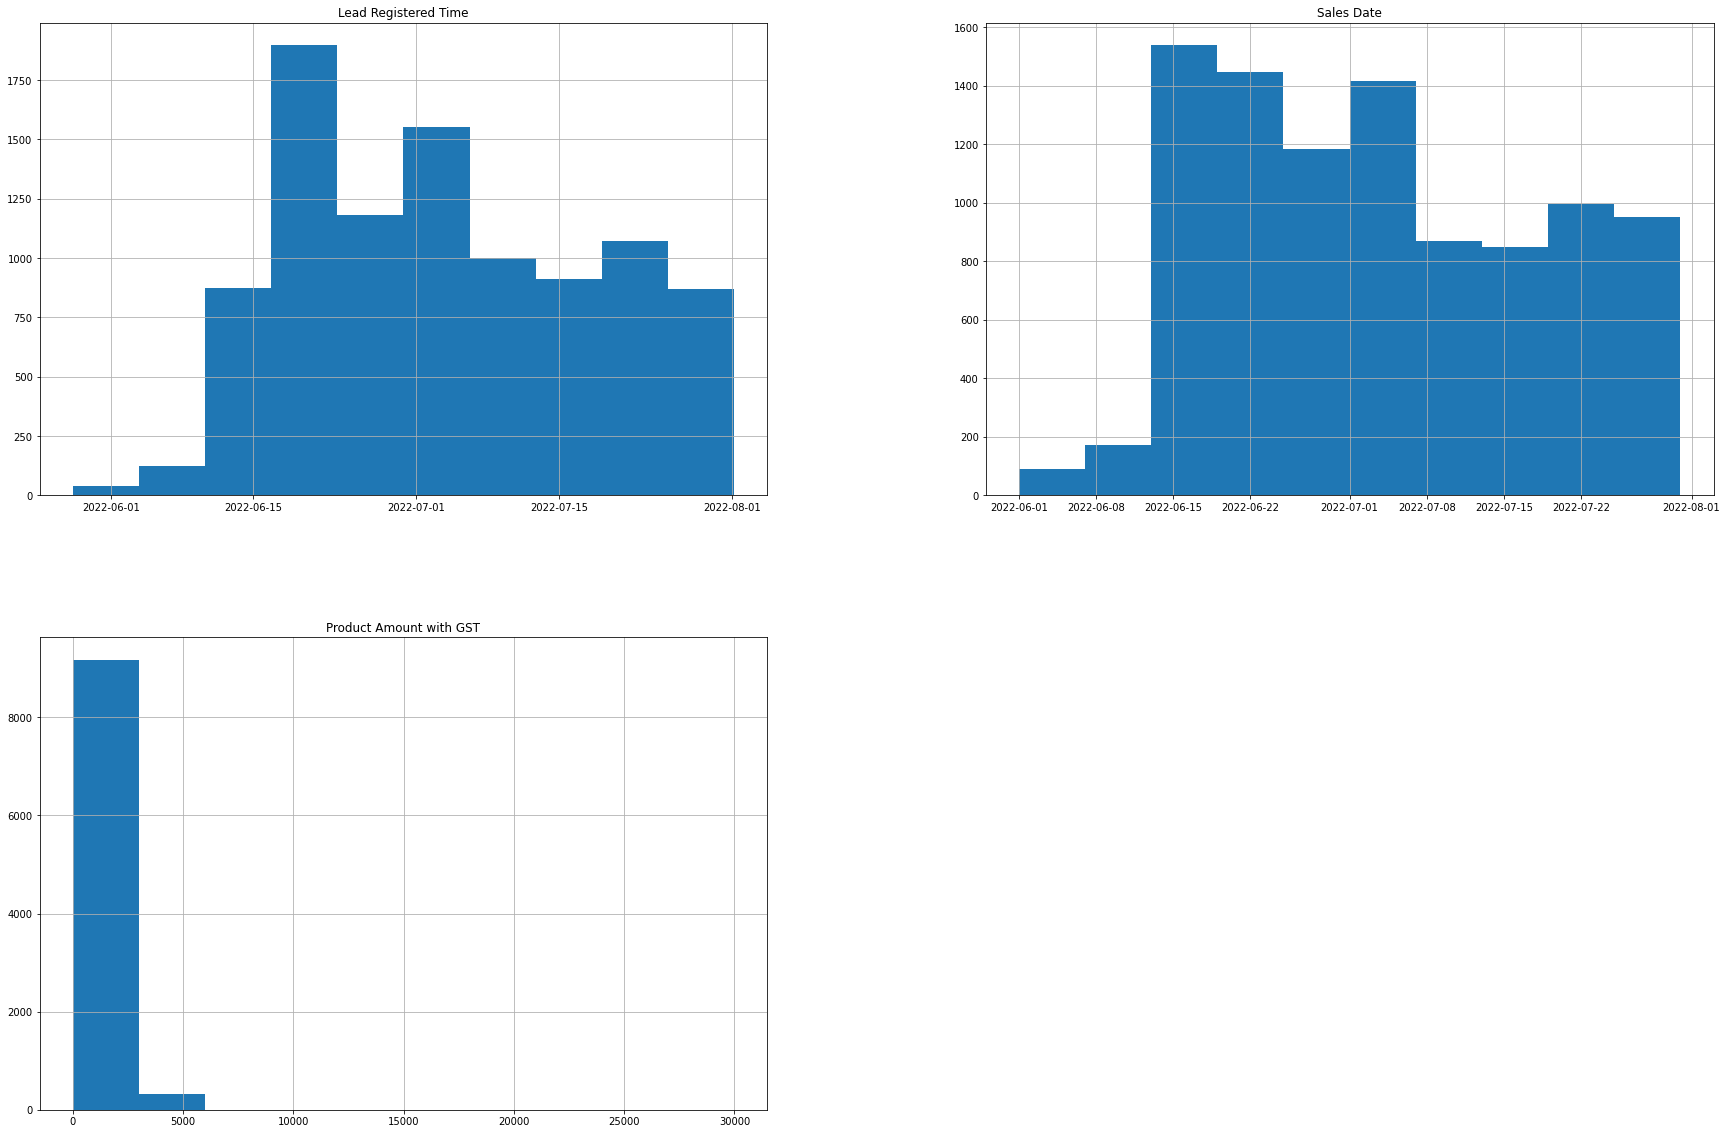

In [107]:
data.hist(figsize=(30,20))
plt.show()

<h3>Visualize the correlation between numerical columns using a heatmap:


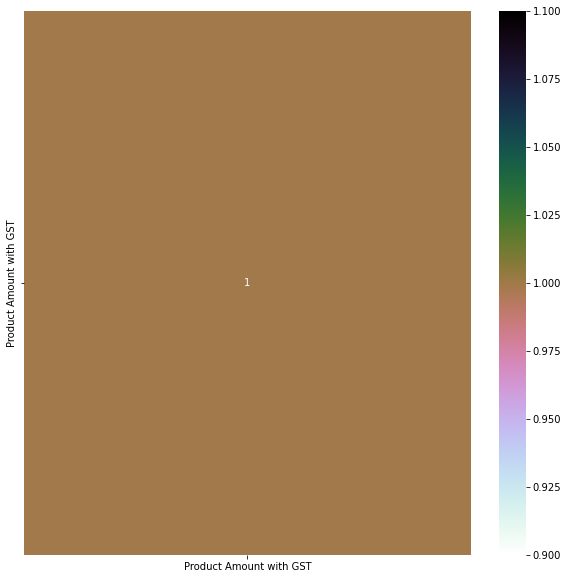

In [106]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [86]:
data.isna().sum()

User ID                       0
Product Code                  0
Payment Status                0
Coupon code                8852
Lead Registered Time          0
Sales Date                    0
Source                        0
Product Amount with GST       1
Payment Mode               7784
Currency  Code                0
Transaction Bank           9422
dtype: int64

In [87]:
data1 = data.rename(columns={'Product Amount with GST': 'Product_amount'})

In [88]:
data1['Product_amount'] = data1['Product_amount'].fillna(0)

In [89]:
data1

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product_amount,Payment Mode,Currency Code,Transaction Bank
0,user1,Product1,Initiated,NaN,2022-08-01 04:55:00,2022-07-31,Direct,3999.00,NaN,INR,NaN
1,user2,Product2,Initiated,NaN,2022-08-01 04:46:00,2022-07-31,Direct,999.00,NaN,INR,NaN
2,user4,Product3,Initiated,NaN,2022-08-01 03:21:00,2022-07-31,Direct,1999.00,NaN,INR,NaN
3,user6,Product3,Initiated,NaN,2022-08-01 00:56:00,2022-07-31,Direct,1999.00,NaN,INR,NaN
4,user8,Product4,Initiated,NaN,2022-08-01 00:46:00,2022-07-31,Direct,2022.00,NaN,INR,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9509,user7253,Product105,paid,Coupon94,2022-06-01 14:46:00,2022-06-01,Direct,7.92,card,INR,NaN
9510,user7253,Product105,paid,NaN,2022-06-01 12:36:00,2022-06-01,Direct,8.10,card,INR,NaN
9511,user7253,Product105,paid,NaN,2022-06-01 12:31:00,2022-06-01,Direct,7.92,card,INR,NaN
9512,user10657,Product2,paid,NaN,2022-06-01 07:20:00,2022-06-01,Direct,999.00,paylater,INR,NaN


In [90]:
df=data1.dropna(axis=1)

In [91]:
df

,User ID,Product Code,Payment Status,Lead Registered Time,Sales Date,Source,Product_amount,Currency Code
0,user1,Product1,Initiated,2022-08-01 04:55:00,2022-07-31,Direct,3999.00,INR
1,user2,Product2,Initiated,2022-08-01 04:46:00,2022-07-31,Direct,999.00,INR
2,user4,Product3,Initiated,2022-08-01 03:21:00,2022-07-31,Direct,1999.00,INR
3,user6,Product3,Initiated,2022-08-01 00:56:00,2022-07-31,Direct,1999.00,INR
4,user8,Product4,Initiated,2022-08-01 00:46:00,2022-07-31,Direct,2022.00,INR
...,...,...,...,...,...,...,...,...
9509,user7253,Product105,paid,2022-06-01 14:46:00,2022-06-01,Direct,7.92,INR
9510,user7253,Product105,paid,2022-06-01 12:36:00,2022-06-01,Direct,8.10,INR
9511,user7253,Product105,paid,2022-06-01 12:31:00,2022-06-01,Direct,7.92,INR
9512,user10657,Product2,paid,2022-06-01 07:20:00,2022-06-01,Direct,999.00,INR


In [92]:
df.isnull().sum()

User ID                 0
Product Code            0
Payment Status          0
Lead Registered Time    0
Sales Date              0
Source                  0
Product_amount          0
Currency  Code          0
dtype: int64

In [109]:
df.columns

Index(['User ID', 'Product Code', 'Payment Status', 'Lead Registered Time',
       'Sales Date', 'Source', 'Product_amount', 'Currency  Code'],
      dtype='object')

In [93]:
# Filter data to include only transactions within the analysis period
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-01-01')
df1 = df[(df['Sales Date'] >= start_date) & (df['Sales Date'] < end_date)]

<h2>Data Exploration

<h3>1.Finding the overall sales trend





In [94]:
df1['month_year'] = df1['Sales Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df1['month_year']

0       2022-07-31
1       2022-07-31
2       2022-07-31
3       2022-07-31
4       2022-07-31
           ...    
9509    2022-06-01
9510    2022-06-01
9511    2022-06-01
9512    2022-06-01
9513    2022-06-21
Name: month_year, Length: 9514, dtype: object

In [95]:
# grouping month_year by sales
df_temp = df1.groupby('month_year').sum()['Product_amount'].reset_index()
df_temp

,month_year,Product_amount
0,2022-06-01,15591.86
1,2022-06-02,21717.00
2,2022-06-03,23977.00
3,2022-06-04,22032.00
4,2022-06-05,25354.00
...,...,...
56,2022-07-27,237876.00
57,2022-07-28,223191.00
58,2022-07-29,194373.00
59,2022-07-30,232279.00


<h3>Plotting

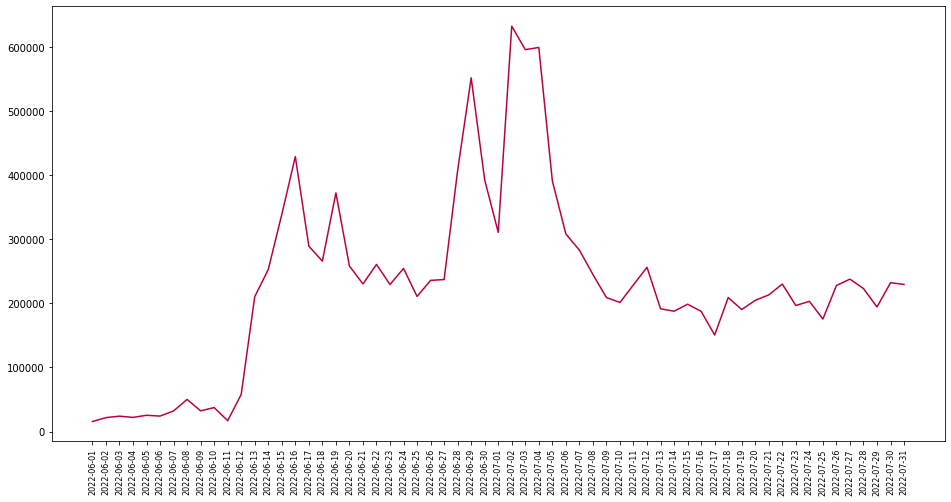

In [111]:
plt.figure(figsize=(16, 8))
plt.plot(df_temp['month_year'], df_temp['Product_amount'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

By this visualization we can easily find the sale trend

<h3>2.Finding the top 20 expensive product soled






In [113]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('Product Code').sum()['Product_amount'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Product_amount'], inplace=True, ascending=False)

prod_sales[:20]

,Product_amount
Product Code,
Product1,3695029.2
Product4,2035095.0
Product3,1617387.0
Product8,1411420.0
Product5,944046.0
Product2,417582.0
Product10,359640.0
Product9,356643.0
Product18,351973.0


By this we can find the expensive product.
we can find that the expensive product is product1


<h3>Visualization of top 20 expensive products

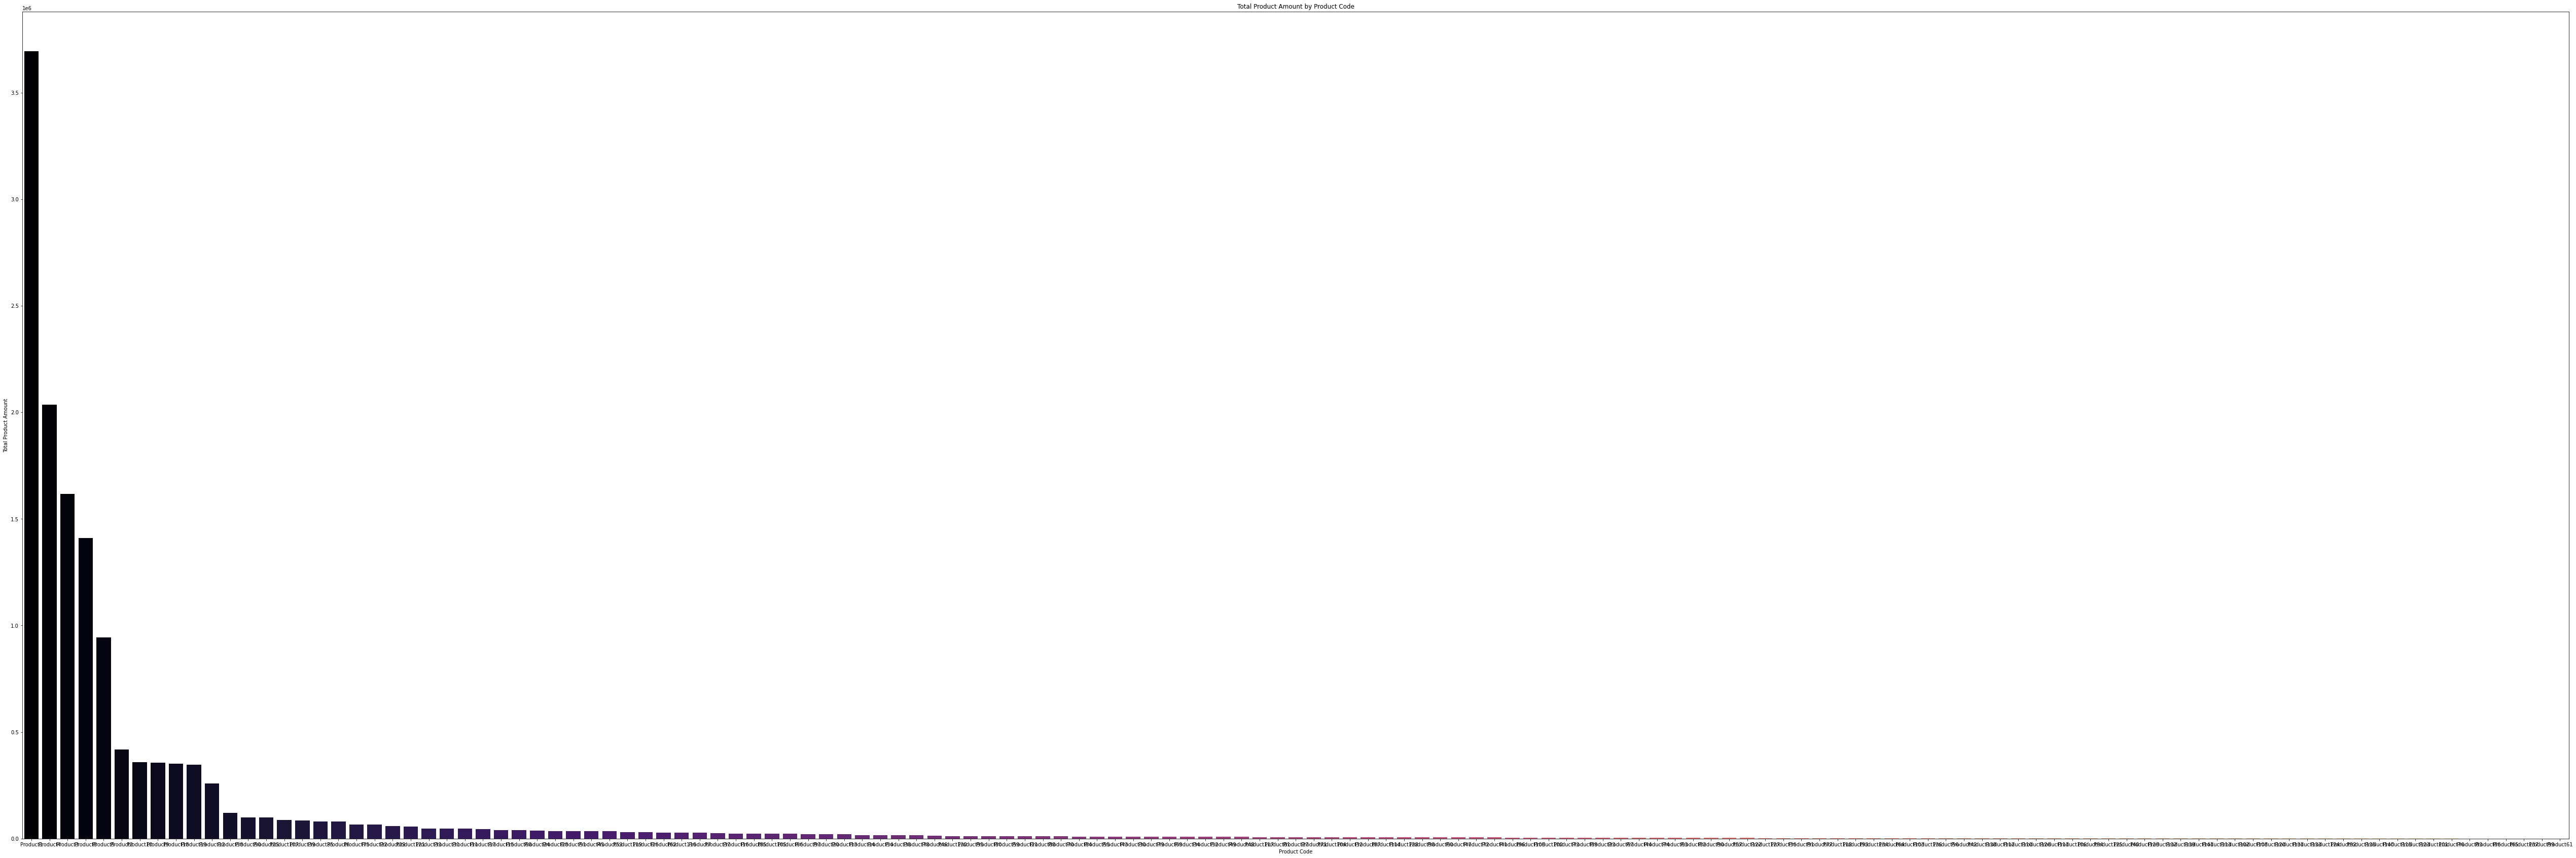

In [147]:
# Create a pivot table of product code and product amount
product_pivot = df.pivot_table(values='Product_amount', index='Product Code', aggfunc=np.sum)

# Sort the pivot table by product amount in descending order
product_pivot.sort_values(by='Product_amount', ascending=False, inplace=True)

# Plot a bar chart of the pivot table
plt.figure(figsize=(90,30))
sns.barplot(x=product_pivot.index, y='Product_amount', data=product_pivot, palette='magma')
plt.title('Total Product Amount by Product Code')
plt.xlabel('Product Code')
plt.ylabel('Total Product Amount')
plt.show()

<h3>3.Finding the most selling product




In [118]:
# Group the data by product code and count the number of occurrences
product_count = df.groupby('Product Code')['Product Code'].count()

# Sort the product count in descending order
product_count = product_count.sort_values(ascending=False)

# Print the top 5 most sold product codes
print("Top 5 Most Sold Product Codes:")
print(product_count.head(5))

Top 5 Most Sold Product Codes:
Product Code
Product8    1560
Product1    1272
Product4    1020
Product3     838
Product5     504
Name: Product Code, dtype: int64


From the above result we can see that product8 has soled many number of times

<h3>Visualization of most selling product

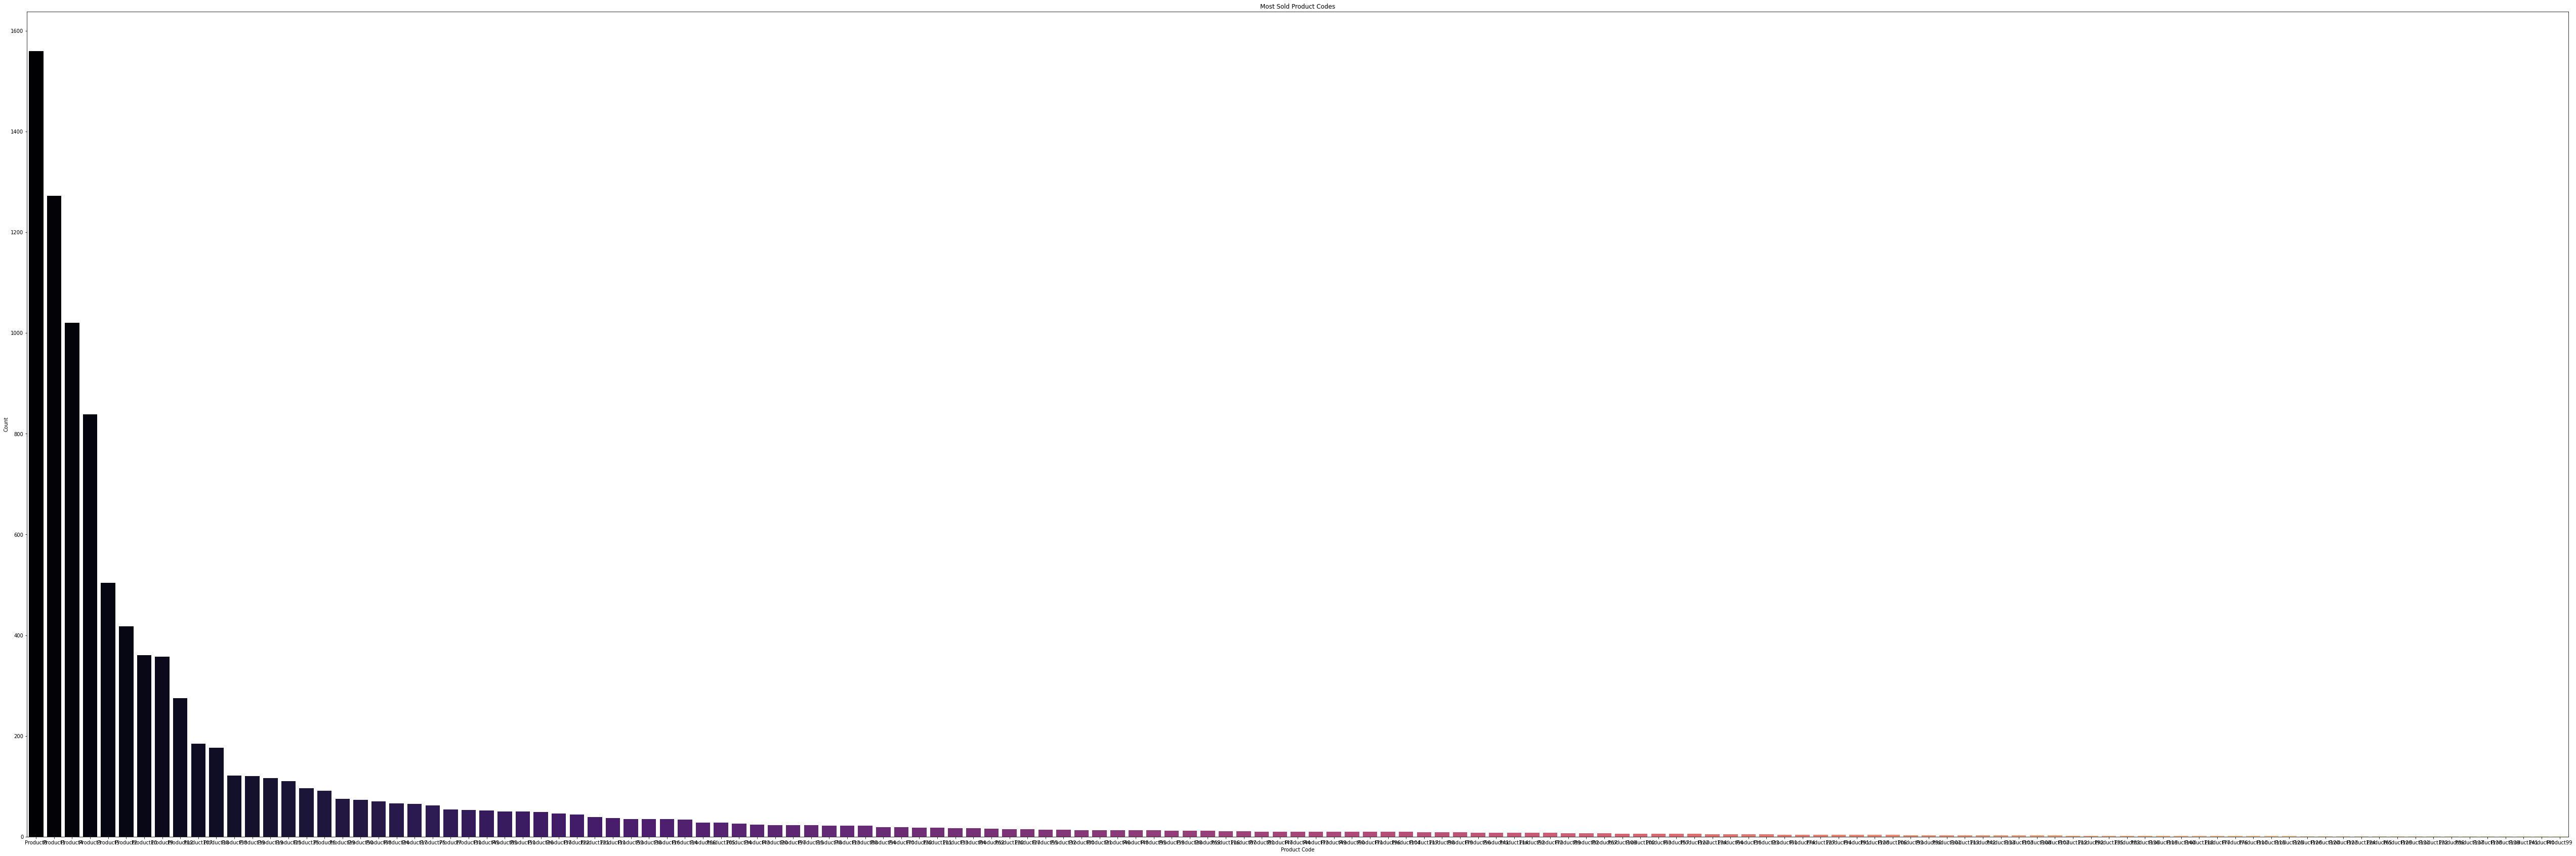

In [127]:
# Plot a bar chart of the product count
plt.figure(figsize=(90,30))
sns.barplot(x=product_count.index, y=product_count.values, palette='magma')
plt.title('Most Sold Product Codes')
plt.xlabel('Product Code')
plt.ylabel('Count')
plt.show()

<h3>4.Finding the most profitable category






In [136]:
# Create a pivot table of product code and sales amount
profit_pivot = df.pivot_table(values='Product_amount', index='Product Code', aggfunc=np.sum)

# Sort the pivot table by sales amount in descending order
profit_pivot.sort_values(by='Product_amount', ascending=False, inplace=True)

# Print the most profitable category
print("Most Profitable Category:")
print(profit_pivot.index[0])

Most Profitable Category:
Product1


<h3>Visualizing the most profitable category with the help of Barplot

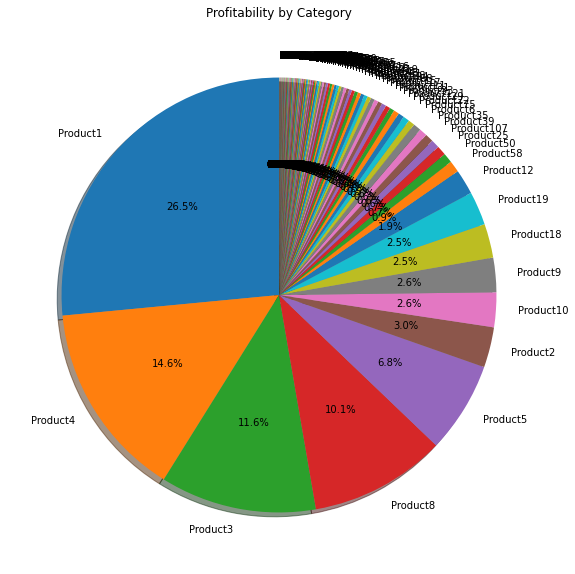

In [143]:
# Calculate the total sales amount for each product code
product_sales = df.groupby('Product Code')['Product_amount'].sum()

# Sort the sales amount in descending order
product_sales = product_sales.sort_values(ascending=False)

# Plot a pie chart of the sales amount by product code
plt.figure(figsize=(20, 10))
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Profitability by Category')
plt.show()


The above Barplot shows the most profitable category. Product1 gives the most profit.

<h3>5.Finding the most preffered currency code

In [145]:
# Count the number of sales for each currency code
currency_count = df['Currency  Code'].value_counts()

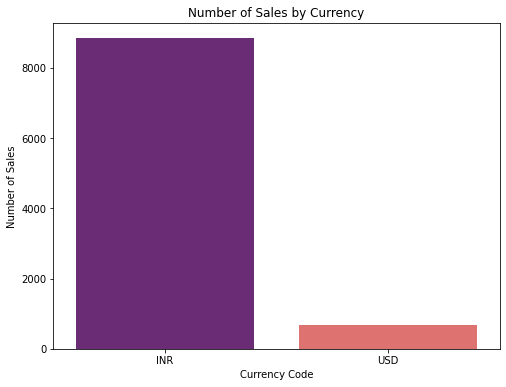

In [146]:
# Plot a bar chart of the currency count
plt.figure(figsize=(8, 6))
sns.barplot(x=currency_count.index, y=currency_count.values, palette='magma')
plt.title('Number of Sales by Currency')
plt.xlabel('Currency Code')
plt.ylabel('Number of Sales')
plt.show()

INR currency is mostly used for the products.